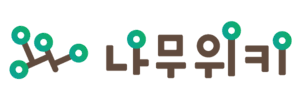

[JSON Dummy Data Generator](https://www.mockaroo.com/)

In [ ]:
!find . -name *.json
!pip3 install namu-wiki-extractor
!pip3 install ijson

In [ ]:
import json
from namuwiki.extractor import extract_text
import ijson
from google.colab import drive
drive.mount('/content/drive')
locate = "./drive/MyDrive/namuwiki_20210301.json"

In [ ]:
import re
import json
from namuwiki.extractor import extract_text

def parse_namuwiki_json(limit = -1, debug=False):
  i = 0
  doc = {}
  with open(locate, 'r') as f:
    for prefix, event, value in ijson.parse(f):
      
      if debug:
        print(prefix, event, value)

      if (prefix, event) in capture_values:
        doc[prefix[5:]] = value
      if (prefix, event, value) == ("item", "end_map", None):
        yield doc    
        doc = {}
        i += 1

        if limit > 0 and i >= limit:
          break

r = re.compile('[0-9]{1}월 [0-9]{1,2}일')
f = open('dump1.txt', 'w')
for doc in parse_namuwiki_json(205000, debug=False):
    if re.match(r, doc['title']) != None :
        f.write(doc['title']+"\n")
        f.write(extract_text(doc['text'])+"\n")
        #f.write(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", doc['text'].replace("\n",""))+"\n") 
        # 정규식으로 특수문자 제외했지만 실패
f.close()

# for doc in parse_namuwiki_json(2000, debug=False):
#   if re.match(r, doc['title']) != None :
#     print(clean_text(doc))
#   print(doc['text'])
#   print("===" * 10)
#   doc['text'] = extract_text(doc['text'])
#   print(doc['text'])

NameError: ignored

In [ ]:
from namuwiki.extractor import extract_text
import re

cleaning_first_patterns = [
  # 아래 두개는 각주 형식이라서 있으면 이상하게 문자열 끝에 추가됨;;
  # [* 채집으로 한 번 아이템을 획득하면 "다시, (채집 스킬)에 의해..."가 뜨면서 한꺼번에 획득되는 구조.]
  r"\[\*[^\]]+\]",
  r"~~[^~]+~~"
]
cleaning_first_patterns = [re.compile(pattern, re.IGNORECASE | re.MULTILINE) for pattern in cleaning_first_patterns]

cleaning_patterns = [
  # 괄호와 그 내용들 제거, 
  # 안녕(하세요) -> 안녕
  r"\([^\)]+\)"
]
cleaning_patterns = [re.compile(pattern, re.IGNORECASE | re.MULTILINE) for pattern in cleaning_patterns]

# \n -> 띄어쓰기 
# \' -> '
replace_patterns = {
    '\\n': "\n",
    "\\'": "'"
}

def clean_text(text):
  for regex in cleaning_first_patterns:
    text = re.sub(regex, "", text)
   
  text = extract_text(text)

  for regex in cleaning_patterns:
    text = re.sub(regex, "", text)
  for k, v in replace_patterns:
    text = text.replace(k, v)
  return text

In [ ]:
capture_values = [
    ("item.namespace", "string"),
    ("item.title", "string"),
    ("item.text", "string")
]

def parse_namuwiki_json(limit = -1, debug=False):
  i = 0
  doc = {}
  with open(locate, encoding = 'utf-8') as f:
    for prefix, event, value in ijson.parse(f):
      
      if debug:
        print(prefix, event, value)

      if (prefix, event) in capture_values:
        doc[prefix[5:]] = value
      if (prefix, event, value) == ("item", "end_map", None):
        yield doc    
        doc = {}
        i += 1

        if limit > 0 and i >= limit:
          break

f = open('dump1.txt', 'w')
for nal in range(1,32) :
    reee = f"3월 {nal}일"
    regexp = re.compile(reee)
    for doc in parse_namuwiki_json(200000, debug=False):
        if re.match(regexp, doc['title']) != None :
            #print(doc['title'])
            #print(doc['text'])
            print("===" * 20)
            doc['text'] = extract_text(doc['text'])
            event = False
            fest = False
            dic = {'기념일':[], '사건':{}}
            for i in str(doc['text']).split("\n") :
                print(i)
                if i == "사건" :
                    event = True
                elif i == "축일" :
                    event = False
                    fest = True
                elif i == "생일" :
                    fest = False
                    break
                if event :
                    tmp = i.split(" - ")
                    #tdic = {} 딕셔너리를 사용하니 뭔가 이상
                    if len(tmp) >= 2 :
                        try :
                            dic['사건'][tmp[0]] = tmp[1]
                        except :
                            pass
                elif fest :
                    dic['기념일'].append(i)
            # print(str(dic).replace("'",'"'))
            data = json.dumps(dic, ensure_ascii=False)
            f.write(",")
            f.write('"'+reee+'":')
            # f.write(str(dic).replace('"','\"'))
            f.write(data)
            # print(str(dic).replace('"',"&").replace("'",'"'))
            print(data)
            break
f.close()
# data = json.dumps(dic, ensure_ascii=False)

개요
1년의 60번째(윤년의 경우 61번째) 날에 해당한다. 윤년의 경우 이 날부터 평년보다 하루씩 늦게 돌아간다.
사건
대한민국 학교의 회계일이다.
293년 - 로마 제국에서 사두정치가 시작되었다.
317년 - 로마 제국의 내전 중, 마르디아 전투(316년 말 or 317년 초)에서 콘스탄티누스 1세가 이끄는 군대가 리키니우스의 군대를 상대로 승리하였다. 그 결과로 이 날 3월 1일에 세르디카에서 조약을 맺었는데, 그 조건은 살려는 드릴게로 요약된다. 위의 24년 전 사두정치가 시작한 날과 같은데, 우연이 아니라 콘스탄티누스의 의도적인 날짜 선정이다.
926년 - 발해가 거란의 침입으로 멸망하였다.
1815년 - 나폴레옹 보나파르트가 엘바 섬을 탈출했다.
1901년 - 세계 최초의 모노레일 부퍼탈 모노레일이 개통한 날이다.
1919년 - 기미독립선언을 통해 대한민국이 자주국임을 선언했으며, 3.1 운동이 일어났다. 이날은 현재 삼일절이라는 국경일로 지정되어 있다.
1920년 - 삼일절 경축 행사가 최초로 시행되었다.
1932년
일제는 1931년 만주사변을 일으켜 만주를 침략했고 이듬해 자신들의 꼭두각시 괴뢰 정권인 만주국을 세웠다.
찰스 린드버그의 20개월 된 장남이 유괴되었다.(찰스 린드버그 주니어 유괴사건) 시신은 5월 14일에 발견되었다.
1938년 - 삼성그룹의 뿌리인 삼성상회가 경상북도 대구시에서 창업했다.
1946년 - 연합군이 사가미 만과 쿠쥬쿠리 해안에 720,000명의 병력과 약 3000기의 항공기를 동원하는 코로넷 작전이 시행될 예정이었다.
1947년 - 제주 관덕정에서 3.1절 기념 만세시위 발포사건이 일어났다. 이 사건은 제주 4.3사건의 불씨가 되었고, 이후 제주도는 1954년 한라산 금족령이 풀릴 때까지 '빨갱이의 섬'이라는 오명을 뒤집어썼다.
1969년 - 대한항공이 출범했다.
1980년 - 전두환이 중장으로 진급했다.
1995년 - 종합유선방송인 케이블 TV가 국내 최초로 방송을 시작했다.
2002년 - 세서미 스트리트의 4000

KeyboardInterrupt: ignored

In [ ]:
# Just Test
# 테스트용 코드
capture_values = [
    ("item.namespace", "string"),
    ("item.title", "string"),
    ("item.text", "string")
]

def parse_namuwiki_json(limit = -1, debug=False):
  i = 0
  doc = {}
  with open(locate, encoding = 'utf-8') as f:
    for prefix, event, value in ijson.parse(f):
      
      if debug:
        print(prefix, event, value)

      if (prefix, event) in capture_values:
        doc[prefix[5:]] = value
      if (prefix, event, value) == ("item", "end_map", None):
        yield doc    
        doc = {}
        i += 1

        if limit > 0 and i >= limit:
          break

f = open('dump1.txt', 'w')
for nal in range(1,32) :
    reee = f"3월 {nal}일"
    regexp = re.compile(reee)
    for doc in parse_namuwiki_json(200000, debug=False):
        if re.match(regexp, doc['title']) != None :
            #print(doc['title'])
            #print(doc['text'])
            print("===" * 20)
            dic = {}
            doc['text'] = extract_text(doc['text'])
            event = False
            dic = {'기념일':[], '사건':{}}
            for i in str(doc['text']).split("\n") :
                if i == "사건" :
                    event = True
                elif i == "축일" :
                    event = False
                    #fest = True
                if event :
                    replaceData = re.compile(" \d{1,2}월 \d{1,2}일")
                    splitData = re.compile("\d{3,4}년 - ")
                    tmpKey = None
                    boolTmp = False
                    if boolTmp :
                        if re.match(splitData, i) == None :
                            tmparr = []
                            dic[tmpKey].append(i)
                        else :
                            boolTmp = False
                    elif re.match(splitData, i) != None :
                        tmp = re.compile(" - ")
                        r = re.split(tmp, i)
                        dic[r[0]] = r[1]
                    else :
                        boolTmp = True
                        tmpKey = i
                        dic[tmpKey] = []


                elif fest :
                    dic['기념일'].append(i)
            # print(str(dic).replace("'",'"'))
            data = json.dumps(dic, ensure_ascii=False)
            f.write(",")
            f.write('"'+reee+'":')
            # f.write(str(dic).replace('"','\"'))
            f.write(data)
            # print(str(dic).replace('"',"&").replace("'",'"'))
            print(data)
            break
f.close()
# data = json.dumps(dic, ensure_ascii=False)

{"기념일": [], "사건": [], "대한민국 학교의 회계일이다.": [], "293년": "로마 제국에서 사두정치가 시작되었다.", "317년": "로마 제국의 내전 중, 마르디아 전투(316년 말 or 317년 초)에서 콘스탄티누스 1세가 이끄는 군대가 리키니우스의 군대를 상대로 승리하였다. 그 결과로 이 날 3월 1일에 세르디카에서 조약을 맺었는데, 그 조건은 살려는 드릴게로 요약된다. 위의 24년 전 사두정치가 시작한 날과 같은데, 우연이 아니라 콘스탄티누스의 의도적인 날짜 선정이다.", "926년": "발해가 거란의 침입으로 멸망하였다.", "1815년": "나폴레옹 보나파르트가 엘바 섬을 탈출했다.", "1901년": "세계 최초의 모노레일 부퍼탈 모노레일이 개통한 날이다.", "1919년": "기미독립선언을 통해 대한민국이 자주국임을 선언했으며, 3.1 운동이 일어났다. 이날은 현재 삼일절이라는 국경일로 지정되어 있다.", "1920년": "삼일절 경축 행사가 최초로 시행되었다.", "1932년": [], "일제는 1931년 만주사변을 일으켜 만주를 침략했고 이듬해 자신들의 꼭두각시 괴뢰 정권인 만주국을 세웠다.": [], "찰스 린드버그의 20개월 된 장남이 유괴되었다.(찰스 린드버그 주니어 유괴사건) 시신은 5월 14일에 발견되었다.": [], "1938년": "삼성그룹의 뿌리인 삼성상회가 경상북도 대구시에서 창업했다.", "1946년": "연합군이 사가미 만과 쿠쥬쿠리 해안에 720,000명의 병력과 약 3000기의 항공기를 동원하는 코로넷 작전이 시행될 예정이었다.", "1947년": "제주 관덕정에서 3.1절 기념 만세시위 발포사건이 일어났다. 이 사건은 제주 4.3사건의 불씨가 되었고, 이후 제주도는 1954년 한라산 금족령이 풀릴 때까지 '빨갱이의 섬'이라는 오명을 뒤집어썼다.", "1969년": "대한항공이 출범했다.", "1980년": "전두환이 중장으로 진급했다.", "1995년": "종합유선방송인 케이블 TV가 국내 최초로 

KeyboardInterrupt: ignored

In [ ]:
from namuwiki.extractor import extract_text
import re

cleaning_first_patterns = [
  # 아래 두개는 각주 형식이라서 있으면 이상하게 문자열 끝에 추가됨;;
  # [* 채집으로 한 번 아이템을 획득하면 "다시, (채집 스킬)에 의해..."가 뜨면서 한꺼번에 획득되는 구조.]
  r"\[\*[^\]]+\]",
  r"~~[^~]+~~"
]
cleaning_first_patterns = [re.compile(pattern, re.IGNORECASE | re.MULTILINE) for pattern in cleaning_first_patterns]

cleaning_patterns = [
  # 괄호와 그 내용들 제거, 
  # 안녕(하세요) -> 안녕
  r"\([^\)]+\)"
]
cleaning_patterns = [re.compile(pattern, re.IGNORECASE | re.MULTILINE) for pattern in cleaning_patterns]

# \n -> 띄어쓰기 
# \' -> '
replace_patterns = {
    '\\n': "\n",
    "\\'": "'"
}

def clean_text(text):
  for regex in cleaning_first_patterns:
    text = re.sub(regex, "", text)
   
  text = extract_text(text)

  for regex in cleaning_patterns:
    text = re.sub(regex, "", text)
  for k, v in replace_patterns:
    text = text.replace(k, v)
  return text

In [ ]:
import re, json
dumpstr = """1829년 - 교황 비오 8세, 253대 로마 교황취임.
1854년 - 일본이 미국과 가나가와 조약을 맺고 시모다와 하코다테 두 항구를 개항하다.
1889년 - 에펠 탑이 준공되었다.
1970년
일본항공 351편 공중 납치 사건이 일어났다.
요도 호사건이 발생하다.
1972년 - 수려선 전 구간 폐선.
1985년 - 레슬매니아 1이 개최되었다.
1998년 - 스타크래프트의 북미 출시일."""

replaceData = re.compile(" \d{1,2}월 \d{1,2}일")
splitData = re.compile("\d{3,4}년 - ")
ar = dumpstr.split("\n")
dic = {}
tmpKey = None
boolTmp = False
for i in ar :
    if boolTmp :
        if re.match(splitData, i) == None :
            tmparr = []
            dic[tmpKey].append(i)
        else :
            boolTmp = False
    elif re.match(splitData, i) != None :
        tmp = re.compile(" - ")
        r = re.split(tmp, i)
        dic[r[0]] = r[1]
    else :
        boolTmp = True
        tmpKey = i
        dic[tmpKey] = []

data = json.dumps(dic, ensure_ascii=False)
print(data)

{"1829년": "교황 비오 8세, 253대 로마 교황취임.", "1854년": "일본이 미국과 가나가와 조약을 맺고 시모다와 하코다테 두 항구를 개항하다.", "1889년": "에펠 탑이 준공되었다.", "1970년": ["일본항공 351편 공중 납치 사건이 일어났다.", "요도 호사건이 발생하다."], "1985년": "레슬매니아 1이 개최되었다.", "1998년": "스타크래프트의 북미 출시일."}
